In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Airline_Delay_Cause.csv")


In [2]:
# View first few rows
df.head()


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [3]:
# Data types and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

In [4]:
# Summary statistics
df.describe()


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,179338.000000,179338.000000,178997.000000,178747.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000
mean,2019.480082,6.485725,327.816969,58.709086,18.572643,2.035742,17.094929,0.145307,20.778477,6.830103,0.779572,3863.310676,1325.546199,209.113426,819.949284,6.839941,1501.854875
std,2.410204,3.463516,931.001446,164.378035,47.389651,6.894812,56.279604,0.702149,64.912766,41.446756,3.490499,11902.153241,4067.786987,791.817638,3178.603458,40.440497,4878.178427
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,41.000000,6.000000,1.960000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,288.000000,91.000000,0.000000,28.000000,0.000000,54.000000
50%,2020.000000,6.000000,89.000000,15.000000,5.400000,0.220000,3.300000,0.000000,4.290000,1.000000,0.000000,900.000000,321.000000,12.000000,124.000000,0.000000,286.000000
75%,2022.000000,9.000000,218.000000,40.000000,14.700000,1.620000,9.860000,0.000000,13.010000,3.000000,1.000000,2547.000000,986.000000,131.000000,401.000000,0.000000,964.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,160.000000,438783.000000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


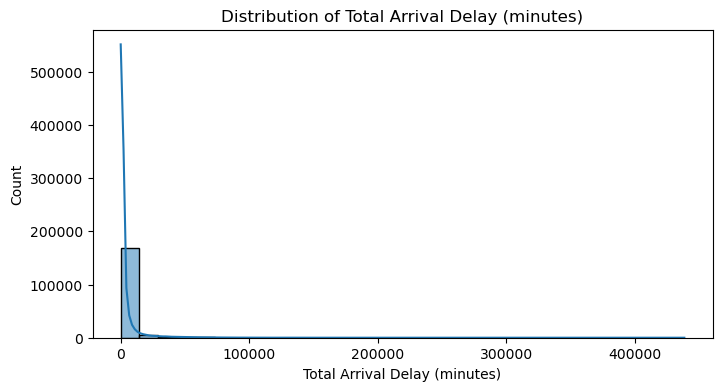

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df['arr_delay'], bins=30, kde=True)
plt.title('Distribution of Total Arrival Delay (minutes)')
plt.xlabel('Total Arrival Delay (minutes)')
plt.show()


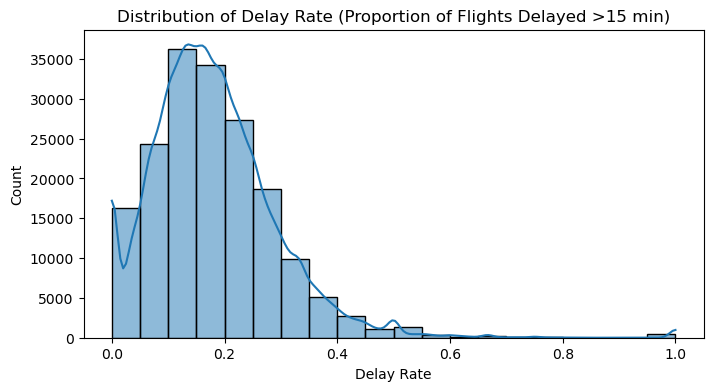

In [6]:
df['delay_rate'] = df['arr_del15'] / df['arr_flights']

plt.figure(figsize=(8,4))
sns.histplot(df['delay_rate'], bins=20, kde=True)
plt.title('Distribution of Delay Rate (Proportion of Flights Delayed >15 min)')
plt.xlabel('Delay Rate')
plt.show()


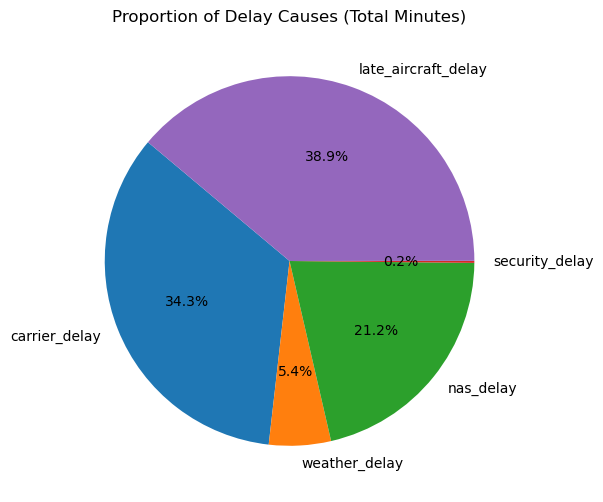

In [7]:
causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
cause_sums = df[causes].sum()

plt.figure(figsize=(6,6))
plt.pie(cause_sums, labels=causes, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Delay Causes (Total Minutes)')
plt.show()


C:\Users\affan\AppData\Local\Temp\ipykernel_17272\1438959740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_airports.values, y=top_airports.index, palette='viridis')


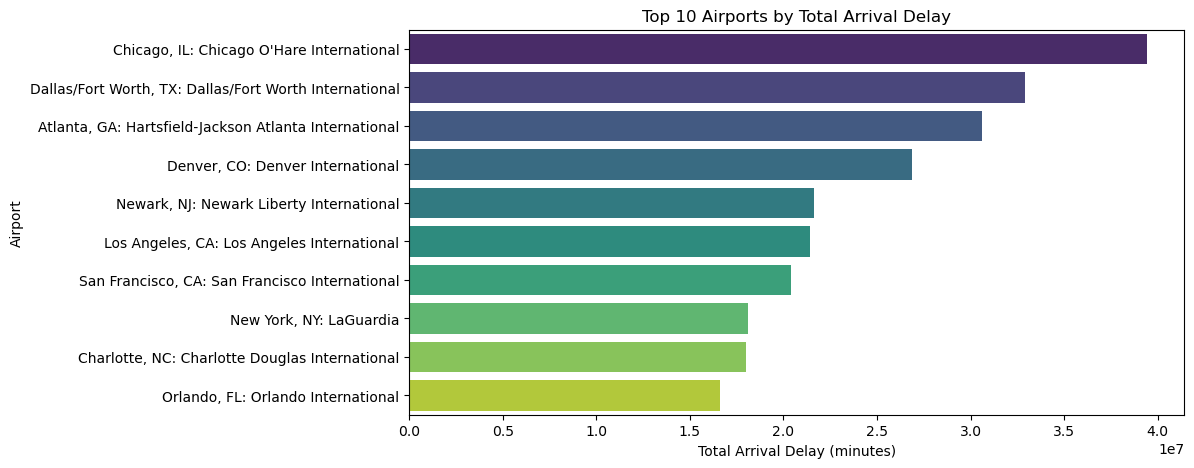

In [8]:
top_airports = df.groupby('airport_name')['arr_delay'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_airports.values, y=top_airports.index, palette='viridis')
plt.title('Top 10 Airports by Total Arrival Delay')
plt.xlabel('Total Arrival Delay (minutes)')
plt.ylabel('Airport')
plt.show()


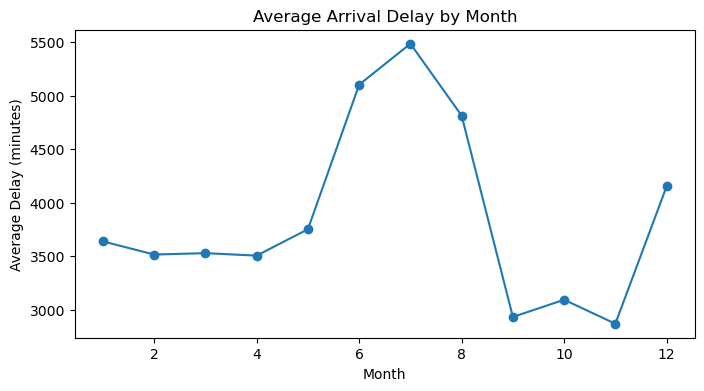

In [9]:
if df['month'].nunique() > 1:
    monthly_delay = df.groupby('month')['arr_delay'].mean()
    plt.figure(figsize=(8,4))
    monthly_delay.plot(marker='o')
    plt.title('Average Arrival Delay by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Delay (minutes)')
    plt.show()


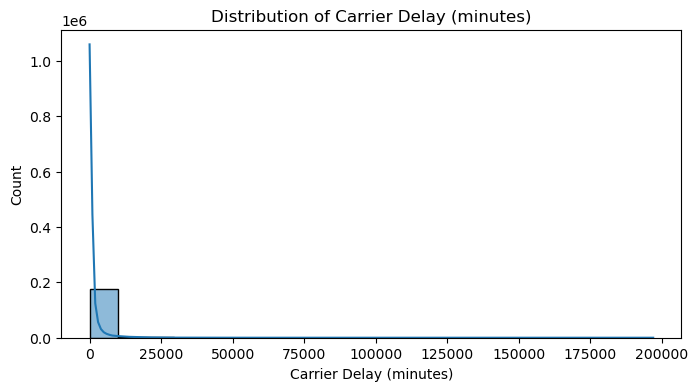

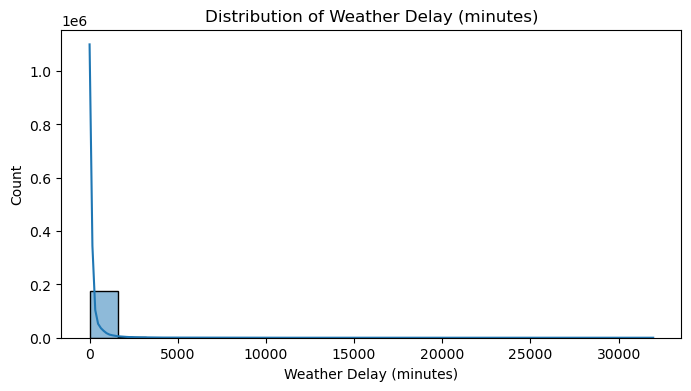

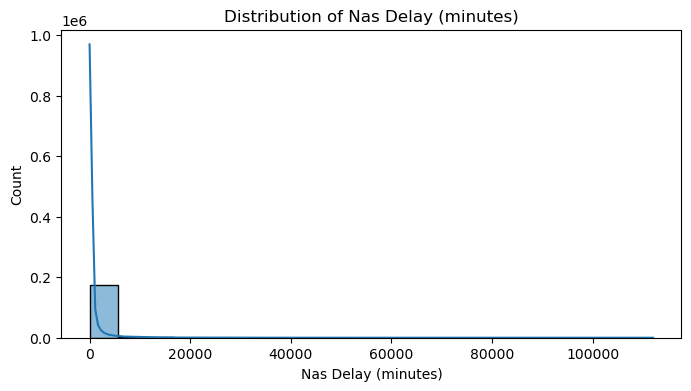

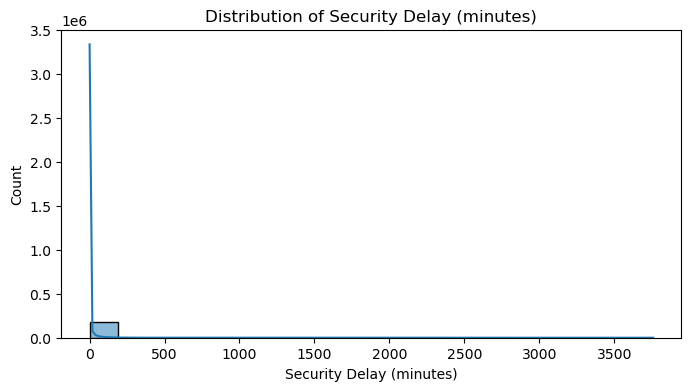

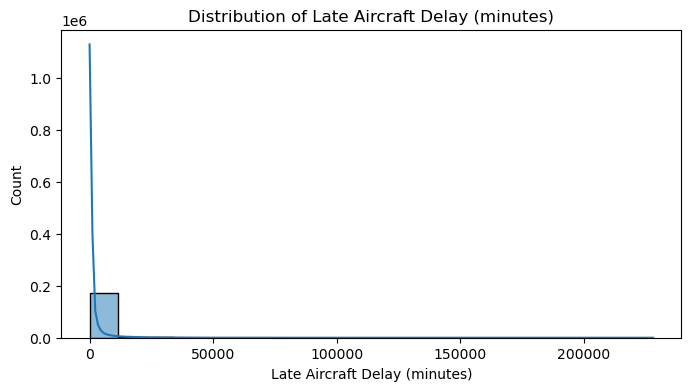

In [10]:
for cause in causes:
    plt.figure(figsize=(8,4))
    sns.histplot(df[cause], bins=20, kde=True)
    plt.title(f'Distribution of {cause.replace("_", " ").title()} (minutes)')
    plt.xlabel(f'{cause.replace("_", " ").title()} (minutes)')
    plt.show()


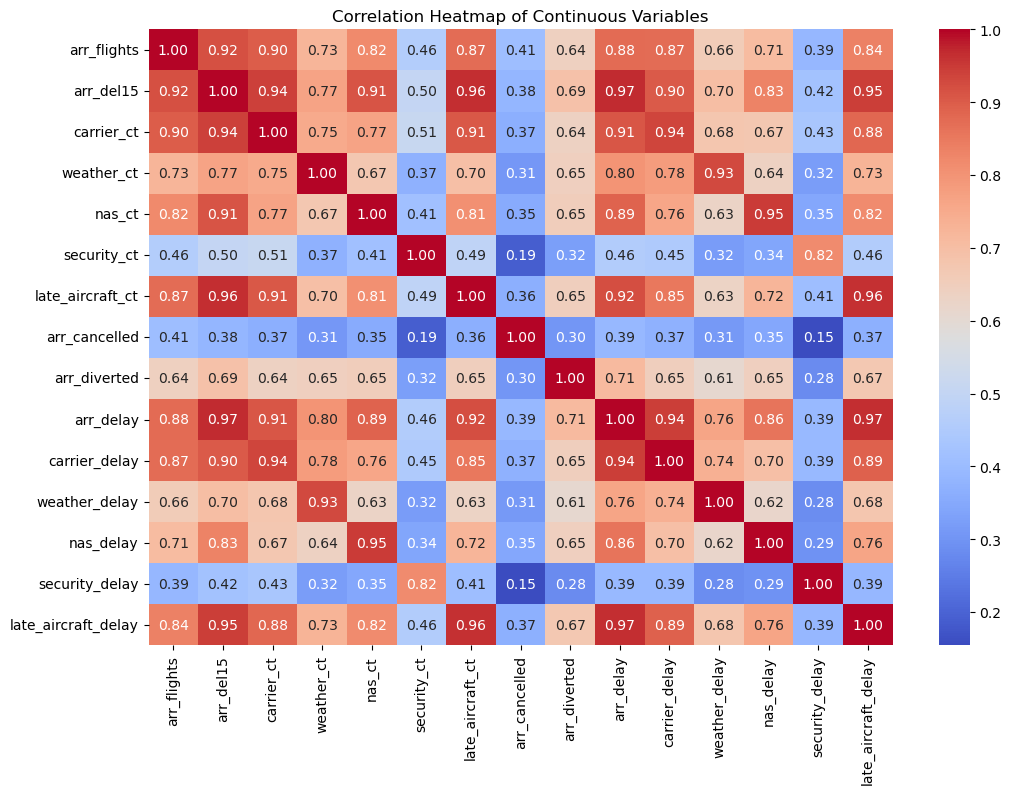

In [11]:
# Select only continuous (numeric) variables
continuous_vars = [
    'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
    'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay',
    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'
]

# Compute correlation matrix
corr_matrix = df[continuous_vars].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

In [12]:
# Check missing value patterns
print("Missing values before handling:")
print(df.isnull().sum())

# Fill missing values strategically
# For flight counts and delays - use 0 (likely no flights/delays)
fill_zero_cols = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 
                  'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 
                  'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 
                  'security_delay', 'late_aircraft_delay']

for col in fill_zero_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values before handling:
year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
delay_rate             591
dtype: int64

Missing values after handling:
year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights              0
arr_del15                0
carrier_ct               0
weather_ct               0
nas_ct                   0
security_ct              0
late_

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Create label encoders for categorical variables
le_carrier = LabelEncoder()
le_airport = LabelEncoder()

# Encode carrier and airport
df['carrier_encoded'] = le_carrier.fit_transform(df['carrier'])
df['airport_encoded'] = le_airport.fit_transform(df['airport'])

# Create frequency encoding for airports (how busy each airport is)
airport_freq = df['airport'].value_counts()
df['airport_frequency'] = df['airport'].map(airport_freq)

# Create frequency encoding for carriers
carrier_freq = df['carrier'].value_counts()
df['carrier_frequency'] = df['carrier'].map(carrier_freq)

print("Categorical encoding completed!")
print(f"Number of unique airports: {df['airport'].nunique()}")
print(f"Number of unique carriers: {df['carrier'].nunique()}")


Categorical encoding completed!
Number of unique airports: 396
Number of unique carriers: 29


In [14]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_rate,carrier_encoded,airport_encoded,airport_frequency,carrier_frequency
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,61.0,574.0,20.0,0.0,17.0,0.069444,0,0,563,7494
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,252.0,0.0,33.0,0.0,63.0,0.112903,0,11,274,7494
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,536.0,0.0,47.0,0.0,276.0,0.105263,0,12,448,7494
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,9.0,0.0,0.0,0.0,66.0,0.086957,0,14,1290,7494
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,8906.0,732.0,1487.0,0.0,10299.0,0.121270,0,23,1413,7494


In [15]:
# Create meaningful features for modeling
df['delay_rate'] = df['arr_del15'] / df['arr_flights']
df['delay_rate'] = df['delay_rate'].fillna(0)  # Handle division by zero

# Total controllable delay (carrier + late aircraft)
df['controllable_delay'] = df['carrier_delay'] + df['late_aircraft_delay']

# Total uncontrollable delay (weather + NAS + security)
df['uncontrollable_delay'] = df['weather_delay'] + df['nas_delay'] + df['security_delay']

# Controllable vs total delay ratio
df['controllable_ratio'] = df['controllable_delay'] / (df['arr_delay'] + 1)  # +1 to avoid division by zero

# Average delay per delayed flight
df['avg_delay_per_delayed_flight'] = df['arr_delay'] / (df['arr_del15'] + 1)

# Create binary target for classification (delayed vs not delayed)
df['is_delayed'] = (df['arr_del15'] > 0).astype(int)

print("Feature engineering completed!")


Feature engineering completed!


In [16]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,delay_rate,carrier_encoded,airport_encoded,airport_frequency,carrier_frequency,controllable_delay,uncontrollable_delay,controllable_ratio,avg_delay_per_delayed_flight,is_delayed
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.069444,0,0,563,7494,78.0,594.0,0.115899,112.000000,1
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.112903,0,11,274,7494,315.0,33.0,0.902579,43.500000,1
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.105263,0,12,448,7494,812.0,47.0,0.944186,78.090909,1
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.086957,0,14,1290,7494,75.0,0.0,0.986842,25.000000,1
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.121270,0,23,1413,7494,19205.0,2219.0,0.896383,83.361868,1


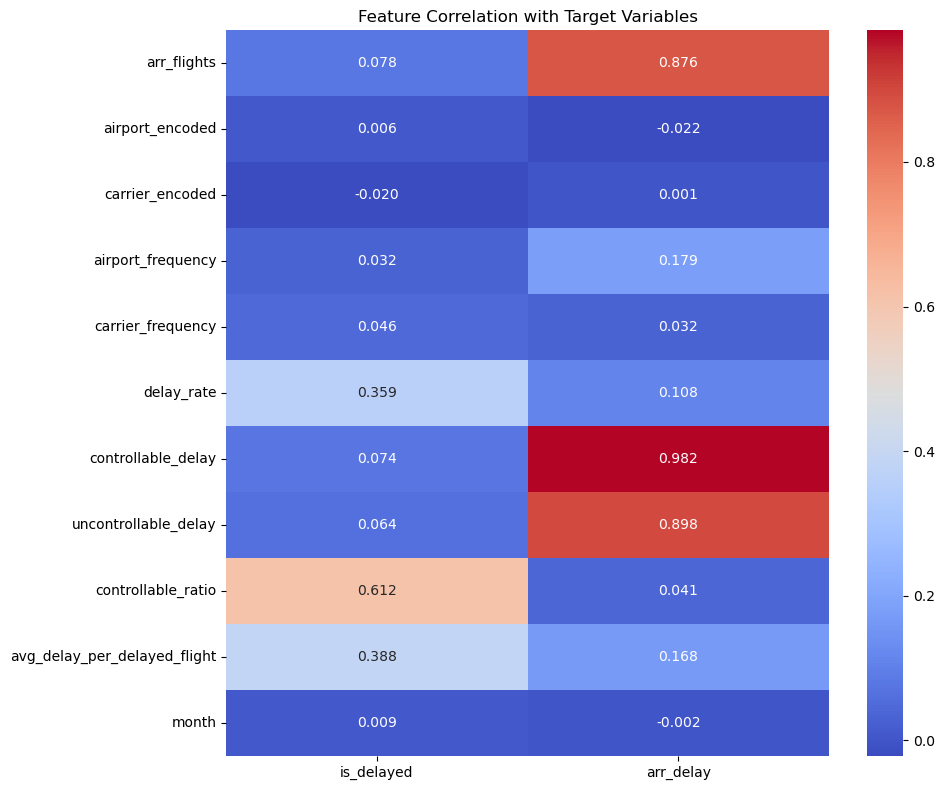

Top features correlated with 'is_delayed':
controllable_ratio              0.611902
avg_delay_per_delayed_flight    0.387515
delay_rate                      0.359098
arr_flights                     0.077980
controllable_delay              0.074433
uncontrollable_delay            0.063568
carrier_frequency               0.045507
airport_frequency               0.031739
carrier_encoded                 0.019968
month                           0.008726
airport_encoded                 0.006267
Name: is_delayed, dtype: float64


In [17]:
# Select features for correlation analysis
model_features = ['arr_flights', 'airport_encoded', 'carrier_encoded', 'airport_frequency', 
                  'carrier_frequency', 'delay_rate', 'controllable_delay', 'uncontrollable_delay',
                  'controllable_ratio', 'avg_delay_per_delayed_flight', 'month']

# Add target variables
target_features = ['is_delayed', 'arr_delay']

# Create correlation matrix
correlation_matrix = df[model_features + target_features].corr()

# Plot correlation with target variables
plt.figure(figsize=(10, 8))
target_corr = correlation_matrix[['is_delayed', 'arr_delay']].drop(['is_delayed', 'arr_delay'])
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Feature Correlation with Target Variables')
plt.tight_layout()
plt.show()

# Print top correlations
print("Top features correlated with 'is_delayed':")
print(target_corr['is_delayed'].abs().sort_values(ascending=False))


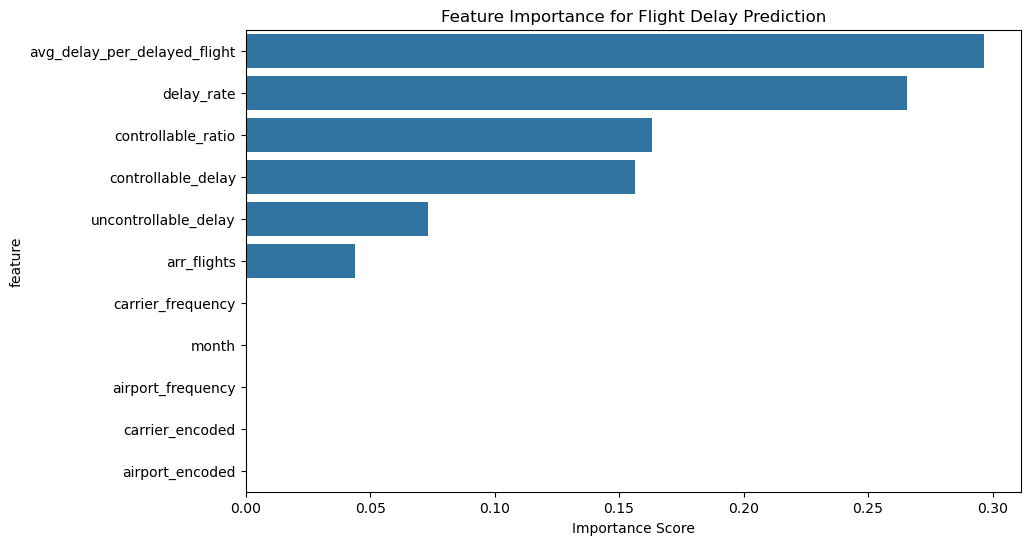

Feature Importance Ranking:
                         feature  importance
9   avg_delay_per_delayed_flight    0.296464
5                     delay_rate    0.265626
8             controllable_ratio    0.163316
6             controllable_delay    0.156382
7           uncontrollable_delay    0.073342
0                    arr_flights    0.044091
4              carrier_frequency    0.000598
10                         month    0.000113
3              airport_frequency    0.000050
2                carrier_encoded    0.000014
1                airport_encoded    0.000003


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Prepare data for feature selection
X = df[model_features].fillna(0)
y_classification = df['is_delayed']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Train Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': model_features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance for Flight Delay Prediction')
plt.xlabel('Importance Score')
plt.show()

print("Feature Importance Ranking:")
print(feature_importance)


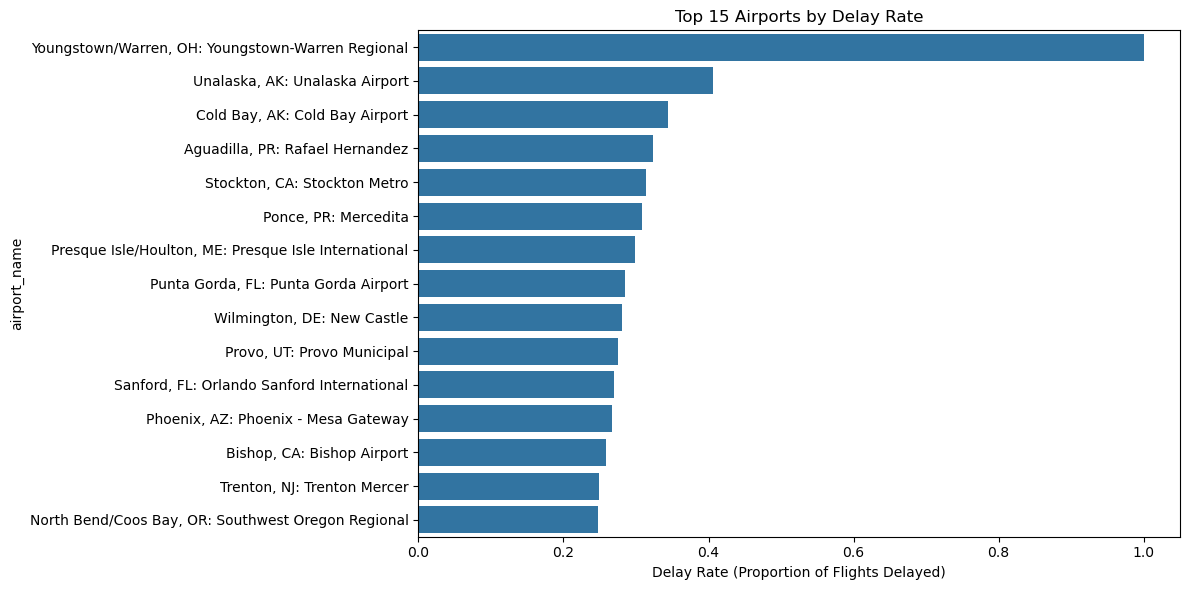

Top 10 airports by delay rate:
                                          airport_name  delay_rate  \
418  Youngstown/Warren, OH: Youngstown-Warren Regional    1.000000   
390                     Unalaska, AK: Unalaska Airport    0.406076   
75                      Cold Bay, AK: Cold Bay Airport    0.343511   
3                      Aguadilla, PR: Rafael Hernandez    0.323468   
374                       Stockton, CA: Stockton Metro    0.313163   
300                               Ponce, PR: Mercedita    0.307812   
305  Presque Isle/Houlton, ME: Presque Isle Interna...    0.299121   
311               Punta Gorda, FL: Punta Gorda Airport    0.285385   
412                         Wilmington, DE: New Castle    0.281369   
308                         Provo, UT: Provo Municipal    0.275784   

     arr_flights  
418          2.0  
390       1613.0  
75         262.0  
3        16759.0  
374       1603.0  
300       6452.0  
305       3186.0  
311      34669.0  
412        263.0  
308     

In [19]:
# Top airports by delay frequency
airport_delay_stats = df.groupby('airport_name').agg({
    'arr_flights': 'sum',
    'arr_del15': 'sum',
    'arr_delay': 'sum',
    'controllable_delay': 'sum'
}).reset_index()

airport_delay_stats['delay_rate'] = airport_delay_stats['arr_del15'] / airport_delay_stats['arr_flights']
airport_delay_stats = airport_delay_stats.sort_values('delay_rate', ascending=False)

# Plot top 15 airports by delay rate
plt.figure(figsize=(12, 6))
top_15_airports = airport_delay_stats.head(15)
sns.barplot(data=top_15_airports, x='delay_rate', y='airport_name')
plt.title('Top 15 Airports by Delay Rate')
plt.xlabel('Delay Rate (Proportion of Flights Delayed)')
plt.tight_layout()
plt.show()

print("Top 10 airports by delay rate:")
print(airport_delay_stats[['airport_name', 'delay_rate', 'arr_flights']].head(10))


In [20]:
# Select top features based on importance score (threshold: > 0.05)
important_features = feature_importance[feature_importance['importance'] > 0.05]['feature'].tolist()

print(f"Selected {len(important_features)} important features:")
print(important_features)

# Create final feature set
final_features = important_features
X_final = df[final_features].fillna(0)
y_classification_final = df['is_delayed']
y_regression_final = df['arr_delay']

print(f"\nFinal dataset shape: {X_final.shape}")
print(f"Target variables created: 'is_delayed' (classification), 'arr_delay' (regression)")


Selected 5 important features:
['avg_delay_per_delayed_flight', 'delay_rate', 'controllable_ratio', 'controllable_delay', 'uncontrollable_delay']

Final dataset shape: (179338, 5)
Target variables created: 'is_delayed' (classification), 'arr_delay' (regression)


In [21]:
# One-hot encoding (recommended for tree models)
month_dummies = pd.get_dummies(df['month'], prefix='month')
df = pd.concat([df, month_dummies], axis=1)

In [22]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,False,False,False,False,False,False,False,False,False,True
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,False,False,False,False,False,False,False,False,False,True
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,False,False,False,False,False,False,False,False,False,True
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,False,False,False,False,False,False,False,False,False,True
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,False,False,False,False,False,False,False,False,False,True


In [23]:
# Remove one-hot encoded months (saves 11-12 features)
month_cols = [col for col in df.columns if col.startswith('month_')]
df = df.drop(columns=month_cols)

# Add cyclical encoding for month (reduces to just 2 features)
import numpy as np
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)


In [24]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,airport_encoded,airport_frequency,carrier_frequency,controllable_delay,uncontrollable_delay,controllable_ratio,avg_delay_per_delayed_flight,is_delayed,month_sin,month_cos
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0,563,7494,78.0,594.0,0.115899,112.000000,1,-2.449294e-16,1.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,11,274,7494,315.0,33.0,0.902579,43.500000,1,-2.449294e-16,1.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,12,448,7494,812.0,47.0,0.944186,78.090909,1,-2.449294e-16,1.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,14,1290,7494,75.0,0.0,0.986842,25.000000,1,-2.449294e-16,1.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,23,1413,7494,19205.0,2219.0,0.896383,83.361868,1,-2.449294e-16,1.0


In [25]:
final_features = [
    # Temporal (2 features instead of 12)
    'month_sin', 'month_cos',
    
    # Key categorical (2 features)
    'airport_encoded', 'carrier_encoded',
    
    # Essential operational (2 features)
    'arr_flights',
    
]

X = df[final_features].fillna(0)
y_classification = df['is_delayed']
y_regression = df['arr_delay']

print(f"Reduced from {len(df.columns)} total columns to {len(final_features)} features")
print(f"Final feature set: {final_features}")



Reduced from 33 total columns to 5 features
Final feature set: ['month_sin', 'month_cos', 'airport_encoded', 'carrier_encoded', 'arr_flights']


In [26]:
from sklearn.model_selection import train_test_split

# X_final and y_classification_final should be your final features and target
X_train, X_test, y_train, y_test = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9575666332106613
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.45      0.51      1767
           1       0.97      0.98      0.98     34101

    accuracy                           0.96     35868
   macro avg       0.78      0.72      0.74     35868
weighted avg       0.95      0.96      0.95     35868



In [28]:
X_train.head(), y_train.head()

(        month_sin     month_cos  airport_encoded  carrier_encoded  arr_flights
 122592  -1.000000 -1.836970e-16               48                2         90.0
 50689   -0.866025  5.000000e-01               61               11         71.0
 9998    -0.500000 -8.660254e-01              261               11         31.0
 127696  -0.500000 -8.660254e-01               58               16         61.0
 163655   1.000000  6.123234e-17              371               22        628.0,
 122592    1
 50689     1
 9998      1
 127696    1
 163655    1
 Name: is_delayed, dtype: int32)

In [29]:
# Sort by airport and time to ensure correct order
df = df.sort_values(['airport_encoded', 'year', 'month'])

# Calculate expanding mean for each airport, shifted to exclude current row
df['hist_delay_rate'] = (
    df.groupby('airport_encoded')['is_delayed']
      .transform(lambda x: x.shift().expanding().mean())
)

# Fill missing values (first month for each airport) with the global mean
df['hist_delay_rate'] = df['hist_delay_rate'].fillna(df['is_delayed'].mean())


In [30]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,airport_frequency,carrier_frequency,controllable_delay,uncontrollable_delay,controllable_ratio,avg_delay_per_delayed_flight,is_delayed,month_sin,month_cos,hist_delay_rate
178496,2015,1,DL,Delta Air Lines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",24.0,3.0,0.60,0.00,...,563,14980,32.0,35.0,0.470588,16.750000,1,0.500000,8.660254e-01,0.950016
178648,2015,1,EV,ExpressJet Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",139.0,30.0,8.76,0.50,...,563,8793,763.0,453.0,0.626952,39.225806,1,0.500000,8.660254e-01,1.000000
177338,2015,2,DL,Delta Air Lines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",25.0,4.0,2.68,0.00,...,563,14980,90.0,26.0,0.769231,23.200000,1,0.866025,5.000000e-01,1.000000
177492,2015,2,EV,ExpressJet Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",139.0,44.0,14.23,2.51,...,563,8793,2043.0,559.0,0.784864,57.822222,1,0.866025,5.000000e-01,1.000000
176178,2015,3,DL,Delta Air Lines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",31.0,3.0,1.00,0.00,...,563,14980,75.0,22.0,0.765306,24.250000,1,1.000000,6.123234e-17,1.000000


In [61]:
final_features = [
    # Temporal (2 features instead of 12)
    'month_sin', 'month_cos',
    
    # Key categorical (2 features)
    'airport_encoded', 'carrier_encoded',
    
    # Essential operational (2 features)
    'arr_flights', 'hist_delay_rate',
    
]

X = df[final_features].fillna(0)
y_classification = df['is_delayed']
y_regression = df['arr_delay']

print(f"Reduced from {len(df.columns)} total columns to {len(final_features)} features")
print(f"Final feature set: {final_features}")


Reduced from 34 total columns to 6 features
Final feature set: ['month_sin', 'month_cos', 'airport_encoded', 'carrier_encoded', 'arr_flights', 'hist_delay_rate']


In [62]:
from sklearn.model_selection import train_test_split

# X_final and y_classification_final should be your final features and target
X_train, X_test, y_train, y_test = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9621947139511542
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.48      0.55      1737
           1       0.97      0.99      0.98     34131

    accuracy                           0.96     35868
   macro avg       0.81      0.73      0.77     35868
weighted avg       0.96      0.96      0.96     35868



In [64]:
def get_hist_delay_rate(df, airport_code, month, year):
    prev_data = df[
        (df['airport_encoded'] == airport_code) &
        ((df['year'] < year) | ((df['year'] == year) & (df['month'] < month)))
    ]
    if len(prev_data) > 0:
        return prev_data['is_delayed'].mean()
    else:
        return df['is_delayed'].mean()  # fallback to global mean

# Example for a new data point
new_airport = 48
new_month = 7
new_year = 2024
hist_delay_rate = get_hist_delay_rate(df, new_airport, new_month, new_year)


In [65]:
from imblearn.over_sampling import SMOTE

# Create the SMOTE object
smote = SMOTE(random_state=42)

# Fit on training data and resample
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check new class distribution
from collections import Counter
print("Resampled training set class distribution:", Counter(y_train_res))


Resampled training set class distribution: Counter({1: 136243, 0: 136243})


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_res, y_train_res)
y_pred = rf_smote.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9572599531615925
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.54      0.55      1737
           1       0.98      0.98      0.98     34131

    accuracy                           0.96     35868
   macro avg       0.77      0.76      0.76     35868
weighted avg       0.96      0.96      0.96     35868



In [69]:
# Ensure indices match (they should after train_test_split)
df_test = df.loc[X_test.index].copy()

weights = ((df_test['carrier_delay'] > 0) | (df_test['late_aircraft_delay'] > 0)).astype(int) * 2 + 1
from sklearn.metrics import f1_score
f1_oai = f1_score(y_test, y_pred, sample_weight=weights.loc[y_test.index])
print("F1 Score with OAI weights:", f1_oai)

F1 Score with OAI weights: 0.9864341951667784


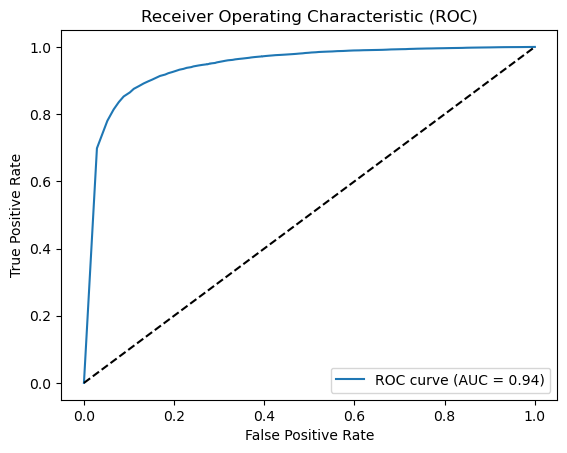

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = rf_smote.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


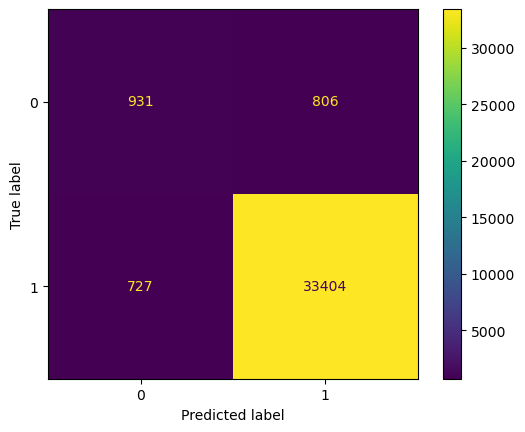

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [70]:
# Option 1: Keep all delays (including negative - early arrivals)
y_regression = df['arr_delay']

# Option 2: Only predict positive delays (filter to delayed flights only)
# delayed_flights = df[df['arr_delay'] > 0]
# X_regression = delayed_flights[final_features]
# y_regression = delayed_flights['arr_delay']

# Use same features as classification
X_regression = df[final_features].fillna(0)

print(f"Regression target stats:")
print(f"Min delay: {y_regression.min()}")
print(f"Max delay: {y_regression.max()}")
print(f"Mean delay: {y_regression.mean():.2f}")
print(f"Median delay: {y_regression.median():.2f}")


Regression target stats:
Min delay: 0.0
Max delay: 438783.0
Mean delay: 3855.96
Median delay: 897.00


In [71]:
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Random Forest Regressor
rf_regressor = RandomForestRegressor(
    n_estimators=100, 
    max_depth=10, 
    random_state=42
)
rf_regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = rf_regressor.predict(X_test_reg)


In [42]:
# Calculate regression metrics (as required by assignment)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)

print("=== REGRESSION MODEL PERFORMANCE ===")
print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")
print(f"R² Score: {r2:.4f}")


=== REGRESSION MODEL PERFORMANCE ===
Mean Absolute Error (MAE): 1416.08 minutes
Root Mean Squared Error (RMSE): 4641.35 minutes
R² Score: 0.8568


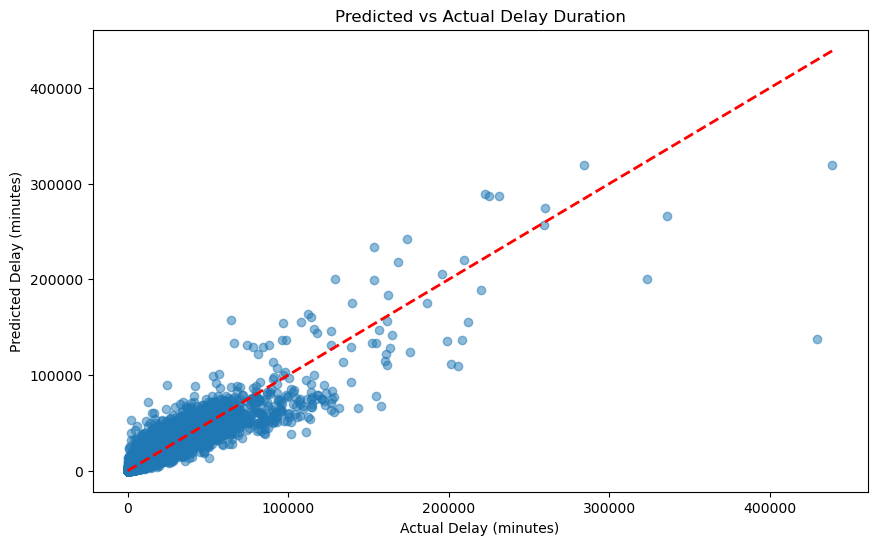

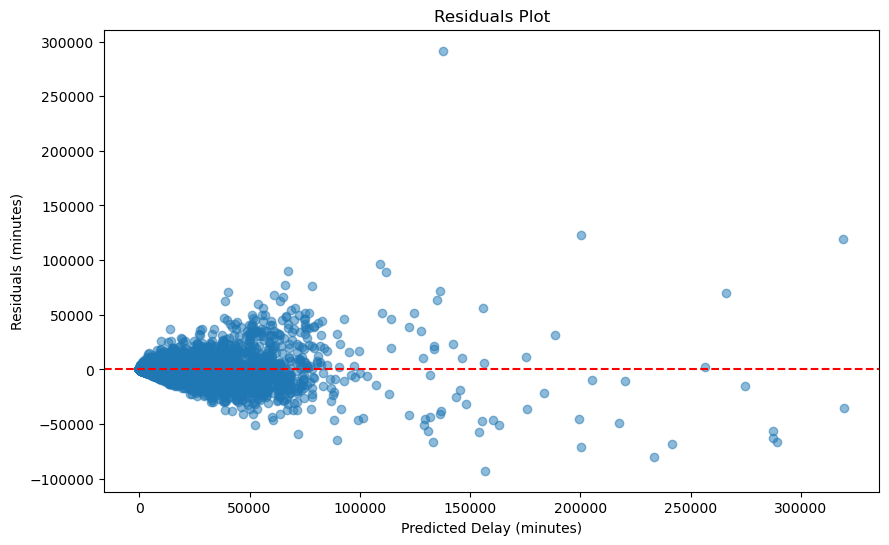

In [43]:
import matplotlib.pyplot as plt

# Predicted vs Actual scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Actual Delay (minutes)')
plt.ylabel('Predicted Delay (minutes)')
plt.title('Predicted vs Actual Delay Duration')
plt.show()

# Residuals plot
plt.figure(figsize=(10, 6))
residuals = y_test_reg - y_pred_reg
plt.scatter(y_pred_reg, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Delay (minutes)')
plt.ylabel('Residuals (minutes)')
plt.title('Residuals Plot')
plt.show()


In [72]:
y_regression = df['arr_delay']

In [73]:
y_regression.head()

178496      67.0
178648    1216.0
177338     116.0
177492    2602.0
176178      97.0
Name: arr_delay, dtype: float64

In [74]:
print("arr_delay summary statistics:")
print(df['arr_delay'].describe())
print("arr_delay max:", df['arr_delay'].max())
print("arr_delay min:", df['arr_delay'].min())
print("arr_delay 99th percentile:", df['arr_delay'].quantile(0.99))


arr_delay summary statistics:
count    179338.000000
mean       3855.964832
std       11892.023197
min           0.000000
25%         286.000000
50%         897.000000
75%        2542.000000
max      438783.000000
Name: arr_delay, dtype: float64
arr_delay max: 438783.0
arr_delay min: 0.0
arr_delay 99th percentile: 56049.78000000003


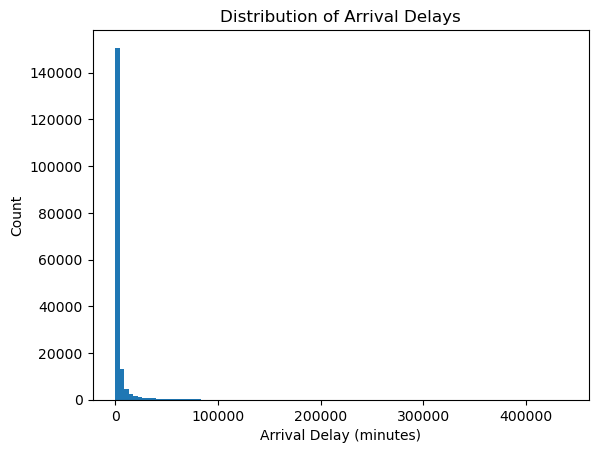

In [75]:
import matplotlib.pyplot as plt
plt.hist(df['arr_delay'], bins=100)
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Arrival Delays')
plt.show()


In [48]:
delay_threshold = 10000  # or df['arr_delay'].quantile(0.99)
df_clean = df[df['arr_delay'] <= delay_threshold]


In [76]:
final_features = [
    'month_sin', 'month_cos', 'airport_encoded', 'carrier_encoded',
    'arr_flights', 'hist_delay_rate'  # Add any other relevant features
]
X = df_clean[final_features].fillna(0)
y = df_clean['arr_delay']


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict
y_pred = rf_reg.predict(X_test)


In [81]:
df_test_reg = df.loc[X_test.index].copy()
df_test_reg['controllable_delay_flag'] = (
    (df_test_reg['carrier_delay'] > 0) | (df_test_reg['late_aircraft_delay'] > 0)
).astype(int)
weights_reg = df_test_reg['controllable_delay_flag'] * 2 + 1  # 3 for controllable, 1 for others



In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_oai = mean_absolute_error(y_test, y_pred, sample_weight=weights_reg)
rmse_oai = np.sqrt(mean_squared_error(y_test, y_pred, sample_weight=weights_reg))

print(f"OAI-weighted MAE: {mae_oai:.2f} minutes")
print(f"OAI-weighted RMSE: {rmse_oai:.2f} minutes")

OAI-weighted MAE: 639.11 minutes
OAI-weighted RMSE: 1008.90 minutes


In [78]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} minutes")
print(f"RMSE: {rmse:.2f} minutes")
print(f"R²: {r2:.3f}")


MAE: 615.33 minutes
RMSE: 985.73 minutes
R²: 0.733


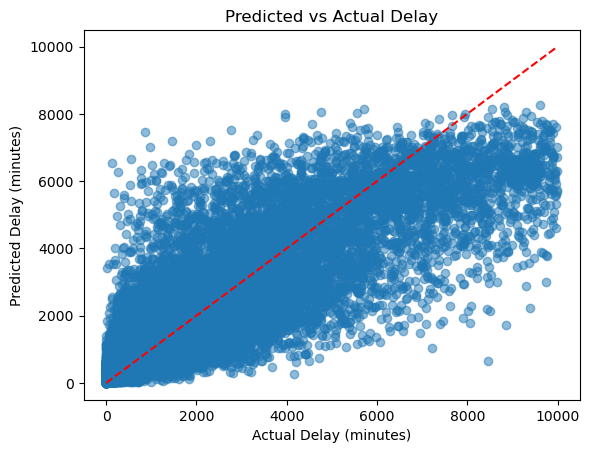

In [52]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Delay (minutes)')
plt.ylabel('Predicted Delay (minutes)')
plt.title('Predicted vs Actual Delay')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


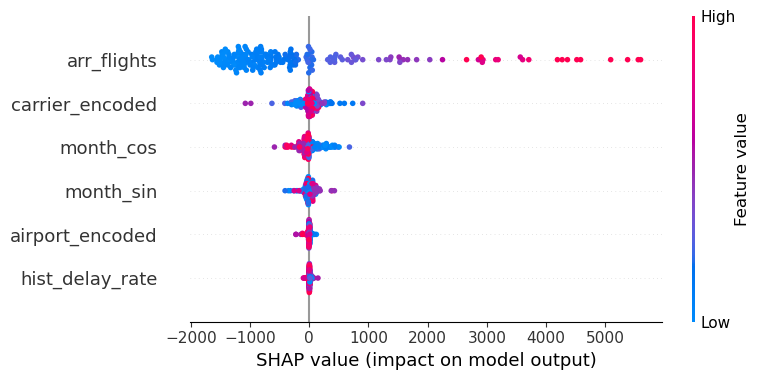

In [60]:
import shap
import numpy as np

# Sample 200 rows from your test set
sample_idx = np.random.choice(X_test.shape[0], size=200, replace=False)
X_test_sample = X_test.iloc[sample_idx]

explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(X_test_sample)

shap.summary_plot(shap_values, X_test_sample)



shap_values shape: (200, 6, 2)
X_test_sample shape: (200, 6)


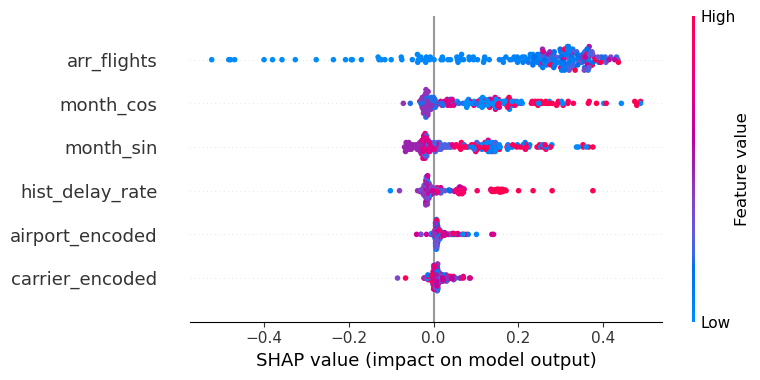

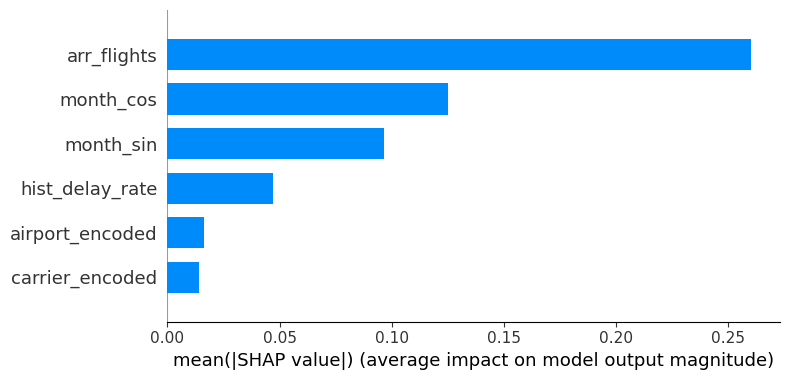

In [56]:
import shap
import numpy as np

# Use the same features as your classification model
final_features = [
    'month_sin', 'month_cos',
    'airport_encoded', 'carrier_encoded', 
    'arr_flights', 'hist_delay_rate'
]

# Make sure you're using the same dataset and features as your trained model
X_classification = df[final_features].fillna(0)

# Sample for SHAP (use same features as training)
sample_size = 200
sample_idx = np.random.choice(X_test.shape[0], size=sample_size, replace=False)
X_test_sample = X_test.iloc[sample_idx]  # Make sure this uses the same 6 features

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_smote)
shap_values = explainer.shap_values(X_test_sample)

# Check shapes for debugging
print(f"shap_values shape: {np.array(shap_values).shape}")
print(f"X_test_sample shape: {X_test_sample.shape}")

# Plot SHAP summary for class 1 (delayed) - correct indexing
shap.summary_plot(shap_values[:, :, 1], X_test_sample, feature_names=X_test_sample.columns)

# Global feature importance bar plot
shap.summary_plot(shap_values[:, :, 1], X_test_sample, plot_type="bar")

